In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)


In [2]:
def asf_project(pr):
    name = pr.split("-")[0]
    if name == "incubator":
        return pr.split("-")[1]
    return name

In [3]:
project = "ozone"

In [4]:
# Parameters
project = "iotdb"


In [5]:
actions = pd.read_csv("github-action-run.csv.gz")
                          
actions.createdat = pd.to_datetime(actions.createdat * 1000000, utc = True)
actions.updatedat = pd.to_datetime(actions.updatedat * 1000000, utc = True)
actions.firstjobstarted = pd.to_datetime(actions.firstjobstarted * 1000000, utc = True)
actions.lastjobcompleted = pd.to_datetime(actions.lastjobcompleted * 1000000, utc = True)                

In [6]:
actions["project"] = actions.repo.apply(asf_project)
actions["jobhours"] = actions.jobseconds / 60 / 60
actions["month"] = actions.createdat.dt.strftime("%Y-%m")

In [7]:
actions =  actions[actions.month.isin(["2021-03","2021-02"])]
last_month = "2021-03"
actions = actions[actions.project == project]

## Job executions per month

Maximum available value is 180 * 24 * days == 129600 (30 days) .. 133920 (31 days)

In [8]:
actions[["jobhours"]].groupby(actions.month).agg({"jobhours":["sum","mean", "max", "count"]})

jobhours                           
                 sum      mean        max count
month                                          
2021-02  1625.233611  1.013238  24.457500  1604
2021-03  4007.576667  1.224061  36.676944  3274

## Number of jobs executed by git repositories (last month)

In [9]:
actions[actions.month == last_month][["repo","jobhours"]].groupby("repo").agg({"jobhours":["sum","mean", "max"]}).sort_values(('jobhours',"sum"), ascending=False).head(20)

jobhours                     
                         sum      mean        max
repo                                             
iotdb            4006.843611  1.229848  36.676944
iotdb-client-go     0.733056  0.045816   0.087778

## Job hour statustics per workflows

In [10]:
actions[actions.month == last_month][["repo","workflowid","jobhours"]].groupby(["repo","workflowid"]).agg({"jobhours":["sum","mean", "max"]}).sort_values(('jobhours',"sum"), ascending=False)

jobhours                     
                                    sum      mean        max
repo            workflowid                                  
iotdb           5418260     1906.402778  3.220275  36.676944
                5418261     1473.771944  2.485282  36.020556
                6002494      286.618333  0.484153   6.003611
                5382244      149.763333  0.841367   1.386389
                3614606      115.273889  1.601026   3.796389
                3977495       38.604167  0.065210   0.578056
                3619302       25.141944  0.349194   1.897500
                6491876        5.271389  0.009584   0.036111
                6891275        5.011944  2.505972   2.515278
                6541463        0.983889  0.065593   0.150278
iotdb-client-go 4697241        0.378889  0.047361   0.087778
                5394128        0.354167  0.044271   0.052500

## Slowest workflow runs


In [11]:
actions.sort_values("jobhours", ascending=False).head(25)

,org,repo,id,runnumber,createdat,updatedat,status,conclusion,workflowid,firstjobstarted,lastjobcompleted,jobdetails,jobs,jobseconds,project,jobhours,month
718029,apache,iotdb,663895366,711,2021-03-18 08:37:11+00:00,2021-03-18 17:15:56+00:00,completed,failure,5418260,2021-03-18 10:54:24+00:00,2021-03-18 17:15:49+00:00,True,9,132037,iotdb,36.676944,2021-03
718025,apache,iotdb,663718679,708,2021-03-18 07:21:38+00:00,2021-03-18 14:43:13+00:00,completed,failure,5418260,2021-03-18 08:25:57+00:00,2021-03-18 14:43:05+00:00,True,9,131998,iotdb,36.666111,2021-03
718022,apache,iotdb,663530605,705,2021-03-18 05:52:15+00:00,2021-03-18 13:02:16+00:00,completed,failure,5418260,2021-03-18 06:50:01+00:00,2021-03-18 13:02:08+00:00,True,9,131966,iotdb,36.657222,2021-03
718023,apache,iotdb,663569405,706,2021-03-18 06:13:29+00:00,2021-03-18 13:11:32+00:00,completed,failure,5418260,2021-03-18 07:04:21+00:00,2021-03-18 13:11:25+00:00,True,9,131919,iotdb,36.644167,2021-03
718024,apache,iotdb,663601029,707,2021-03-18 06:28:26+00:00,2021-03-18 14:01:01+00:00,completed,failure,5418260,2021-03-18 07:46:21+00:00,2021-03-18 14:00:54+00:00,True,9,131903,iotdb,36.639722,2021-03
718716,apache,iotdb,663569401,430,2021-03-18 06:13:29+00:00,2021-03-18 13:17:47+00:00,completed,failure,5418261,2021-03-18 07:12:32+00:00,2021-03-18 13:17:41+00:00,True,6,129674,iotdb,36.020556,2021-03
718730,apache,iotdb,666523729,443,2021-03-19 01:55:47+00:00,2021-03-19 07:59:31+00:00,completed,failure,5418261,2021-03-19 01:56:05+00:00,2021-03-19 07:59:26+00:00,True,6,129674,iotdb,36.020556,2021-03
718907,apache,iotdb,696806859,602,2021-03-29 05:51:13+00:00,2021-03-29 11:51:53+00:00,completed,failure,5418261,2021-03-29 05:51:24+00:00,2021-03-29 11:51:46+00:00,True,6,129674,iotdb,36.020556,2021-03
718717,apache,iotdb,663601026,431,2021-03-18 06:28:26+00:00,2021-03-18 13:35:23+00:00,completed,failure,5418261,2021-03-18 07:26:58+00:00,2021-03-18 13:35:16+00:00,True,6,129673,iotdb,36.020278,2021-03
718714,apache,iotdb,663530607,429,2021-03-18 05:52:15+00:00,2021-03-18 12:47:26+00:00,completed,failure,5418261,2021-03-18 06:42:41+00:00,2021-03-18 12:47:19+00:00,True,6,129672,iotdb,36.020000,2021-03


In [12]:
job = pd.read_csv("github-action-job.csv.gz")                          
job.startedat = pd.to_datetime(job.startedat * 1000000, utc = True)
job.completedat = pd.to_datetime(job.completedat * 1000000, utc = True)
job["project"] = job.repo.apply(asf_project)

In [13]:
job["jobhours"] = (job.completedat - job.startedat).dt.seconds / 60 / 60

In [14]:
job = job[job.project == project]

## Slowest job executions by job names

In [15]:
job[["jobhours"]].groupby([job.org,job.repo, job.name]).sum().reset_index().sort_values("jobhours", ascending=False).head(25)

,org,repo,name,jobhours
62,apache,iotdb,"win (11, server)",617.124167
74,apache,iotdb,"win (8, server)",607.847778
71,apache,iotdb,"win (15, server)",479.653611
32,apache,iotdb,ubuntu,426.322222
49,apache,iotdb,"unix (15, macos-latest)",411.658889
38,apache,iotdb,"unix (11, macos-latest)",401.522778
39,apache,iotdb,"unix (11, ubuntu-latest)",380.434167
56,apache,iotdb,"unix (8, ubuntu-latest)",363.990833
52,apache,iotdb,"unix (8, macos-latest)",357.862222
50,apache,iotdb,"unix (15, ubuntu-latest)",347.696944


## Number of job executions per status

In [16]:
job[["id"]].groupby([job.org,job.repo,  job.conclusion]).count().reset_index().sort_values("id", ascending=False).head(25)

,org,repo,conclusion,id
3,apache,iotdb,success,14418
1,apache,iotdb,failure,5442
0,apache,iotdb,cancelled,686
4,apache,iotdb-client-go,success,92
2,apache,iotdb,neutral,1


In [17]:
start = job.loc[:,["org","repo","project","id","runid","startedat"]]
start["value"] = 1
start = start.rename(columns={"startedat":"date"})

end = job.loc[:,["org","repo","project","id","runid","completedat"]]
end["value"] = -1
end = end.rename(columns={"completedat":"date"})
events = pd.concat([start, end]).sort_values("date")
events["running"] = events.value.cumsum()


## Average (12h window) parallel running/queued job at a given time

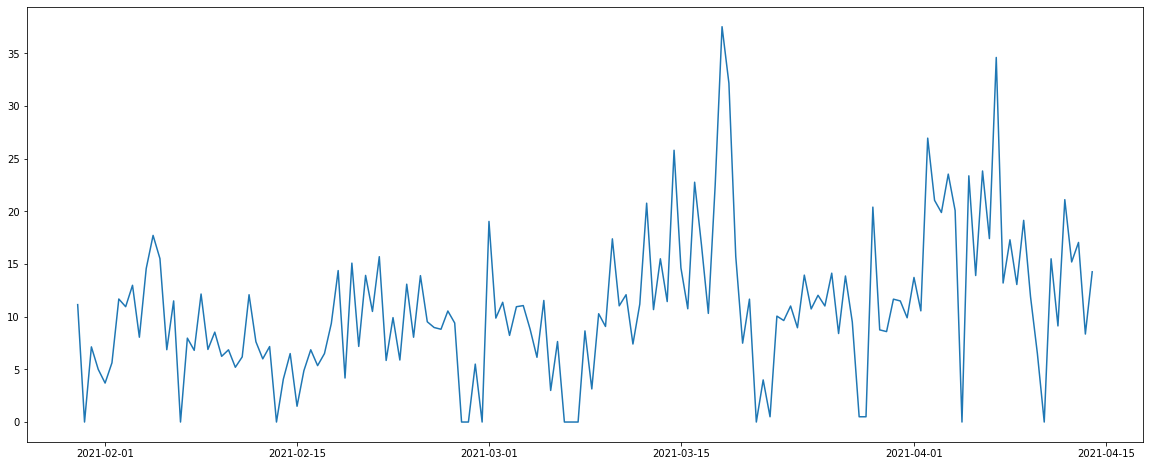

In [18]:

r = events.set_index('date')
r = r.sort_index()
r = r.resample("12H").mean().fillna(0)

plt.figure(figsize=(20,8))
plt.plot(r.index,r.running)
plt.show()

In [19]:
## Max (12h window) parallel running/queued job at a given time

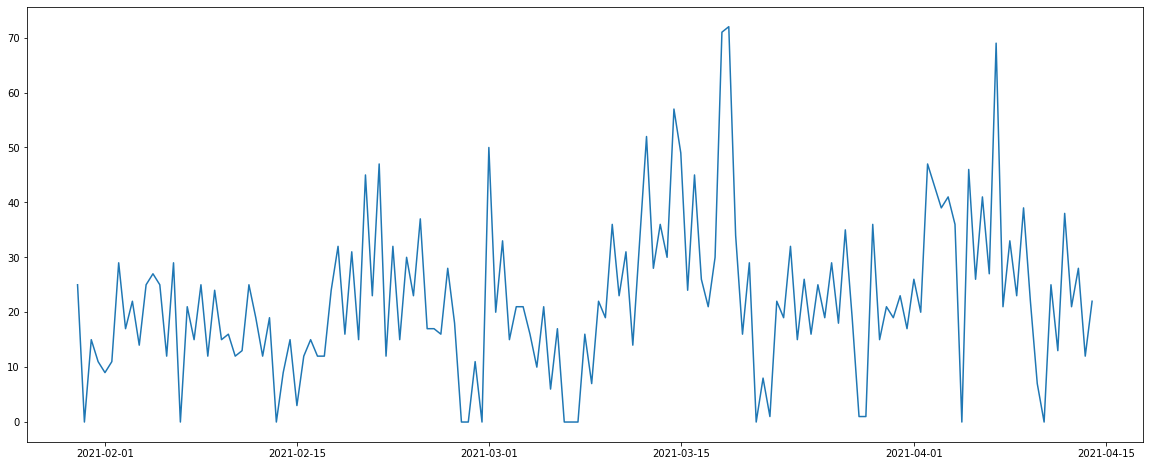

In [20]:

r = events.set_index('date')
r = r.sort_index()
r = r.resample("12H").max().fillna(0)

plt.figure(figsize=(20,8))
plt.plot(r.index,r.running)
plt.show()